In [ ]:
INSURANCE CLAIMS FRAUD DETECTION USING PYTHON

In [2]:
import pandas as pd

In [88]:
df = pd.read_csv('claims_data.csv')
df = pd.read_csv('cust_data.csv')

In [ ]:
1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions.

In [90]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = pd.merge(claims_data, cust_data, left_on='customer_id', right_on='cust_id', how='left')

print(merged_data.head())


   claim_id  customer_id      incident_cause  claim_date claim_area  \
0  54004764     21868593        Driver error  2017-11-27       Auto   
1  33985796     75740424               Crime  2018-10-03       Home   
2  53522022     30308357  Other driver error  2018-02-02       Auto   
3  13015401     47830476      Natural causes  2018-06-17       Auto   
4  22890252     19269962               Crime  2018-01-13       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  \
0            No  Material only        $2980                  1.0         No   
1       Unknown  Material only        $2980                  3.0         No   
2            No  Material only      $3369.5                  1.0        Yes   
3            No  Material only        $1680                  1.0         No   
4            No  Material only        $2680                  1.0         No   

      cust_id  gender dateofbirth state       contact   segment  
0  21868593.0  Female  1979-01-1

In [ ]:
2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their 
business significance.

In [91]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data_dtypes = claims_data.dtypes
cust_data_dtypes = cust_data.dtypes

expected_claims_data_dtypes = {
    'claim_id': 'int64',
    'customer_id': 'int64',
    'incident_cause': 'object',
    'claim_date': 'datetime64',
    'claim_area': 'object',
    'police_report': 'object',
    'claim_type': 'object',
    'claim_amount': 'float64',
    'total_policy_claims': 'int64',
    'fraudulent': 'bool'
}

expected_cust_data_dtypes = {
    'cust_id': 'int64',
    'gender': 'object',
    'dateofbirth': 'datetime64',
    'state': 'object',
    'contact': 'object',
    'segment': 'object'
}

claims_data_mismatches = claims_data_dtypes != pd.Series(expected_claims_data_dtypes)
cust_data_mismatches = cust_data_dtypes != pd.Series(expected_cust_data_dtypes)

print("Claims Data Type Mismatches:")
print(claims_data_mismatches[claims_data_mismatches].index.tolist())

print("\nCustomer Data Type Mismatches:")
print(cust_data_mismatches[cust_data_mismatches].index.tolist())

print("\nActual Data Types in Claims Data:")
print(claims_data_dtypes)

print("\nActual Data Types in Customer Data:")
print(cust_data_dtypes)


Claims Data Type Mismatches:
['claim_date', 'claim_amount', 'total_policy_claims', 'fraudulent']

Customer Data Type Mismatches:
['dateofbirth']

Actual Data Types in Claims Data:
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

Actual Data Types in Customer Data:
cust_id         int64
gender         object
dateofbirth    object
state          object
contact        object
segment        object
dtype: object


In [ ]:
3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [92]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')

claims_data['claim_amount'] = claims_data['claim_amount'].replace({r'\$': ''}, regex=True)

claims_data['claim_amount'] = pd.to_numeric(claims_data['claim_amount'], errors='coerce')

print(claims_data[['claim_amount']].head())


   claim_amount
0        2980.0
1        2980.0
2        3369.5
3        1680.0
4        2680.0


In [ ]:
4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [93]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')

claims_data['alert_flag'] = 0  

claims_data.loc[(claims_data['incident_cause'] == 'injury') & 
                (claims_data['police_report'].isin(['No', 'Unknown'])), 'alert_flag'] = 1

print(claims_data[['claim_id', 'incident_cause', 'police_report', 'alert_flag']].head())


   claim_id      incident_cause police_report  alert_flag
0  54004764        Driver error            No           0
1  33985796               Crime       Unknown           0
2  53522022  Other driver error            No           0
3  13015401      Natural causes            No           0
4  22890252               Crime            No           0


In [ ]:
5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID 
should remain unique.

In [94]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data = claims_data.rename(columns={'customer_id': 'cust_id'})

merged_data = pd.merge(claims_data, cust_data, on='cust_id', how='left')

merged_data['claim_date'] = pd.to_datetime(merged_data['claim_date'], errors='coerce')

merged_data_sorted = merged_data.sort_values(by='claim_date', ascending=False)

merged_data_unique = merged_data_sorted.drop_duplicates(subset='cust_id', keep='first')

print(merged_data_unique[['cust_id', 'claim_id', 'incident_cause', 'claim_date', 'claim_amount']].head())


       cust_id  claim_id  incident_cause claim_date claim_amount
282   93915431  99775483    Other causes 2018-10-30     $42124.5
350   38011078  98795403           Crime 2018-10-30        $1940
1077  65208809  91386759  Natural causes 2018-10-30        $2290
1086  49290530  12632133  Natural causes 2018-10-30        $2875
751   28932340  25213498    Driver error 2018-10-30          NaN


In [ ]:
6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical).

In [95]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data = claims_data.rename(columns={'customer_id': 'cust_id'})
merged_data = pd.merge(claims_data, cust_data, on='cust_id', how='left')

missing_values = merged_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

continuous_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data[continuous_columns] = merged_data[continuous_columns].fillna(merged_data[continuous_columns].mean())

categorical_columns = merged_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mode()[0])

missing_values_after_imputation = merged_data.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation)

print("\nData after imputation (first 5 rows):")
print(merged_data.head())


Missing values per column:
claim_id                0
cust_id                 0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
dateofbirth            15
state                  15
contact                15
segment                15
dtype: int64

Missing values after imputation:
claim_id               0
cust_id                0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
dateofbirth            0
state                  0
contact                0
segment                0
dtype: int64

Data after imputation (first 5 rows):
   claim_id   cust_id      incident_cause  claim_date claim_area  \
0  54004764  21868593        Driver error

In [ ]:
7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria.
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [96]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data = claims_data.rename(columns={'customer_id': 'cust_id'})
merged_data = pd.merge(claims_data, cust_data, on='cust_id', how='left')

print(merged_data['dateofbirth'].head())

merged_data['dateofbirth'] = pd.to_datetime(merged_data['dateofbirth'], errors='coerce')

print(merged_data['dateofbirth'].head())

merged_data['age'] = (pd.to_datetime('today') - merged_data['dateofbirth']).dt.days // 365

def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

merged_data['age_category'] = merged_data['age'].apply(categorize_age)

print(merged_data[['cust_id', 'age', 'age_category']].head())


0    1979-01-12
1    1970-01-13
2    1984-03-11
3    1986-05-01
4    1977-05-13
Name: dateofbirth, dtype: object
0   1979-01-12
1   1970-01-13
2   1984-03-11
3   1986-05-01
4   1977-05-13
Name: dateofbirth, dtype: datetime64[ns]
    cust_id   age age_category
0  21868593  46.0        Adult
1  75740424  55.0        Adult
2  30308357  40.0        Adult
3  47830476  38.0        Adult
4  19269962  47.0        Adult


In [ ]:
8. What is the average amount claimed by the customers from various segments?

In [110]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data = claims_data.rename(columns={'customer_id': 'cust_id'})
merged_data = pd.merge(claims_data, cust_data, on='cust_id', how='left')

merged_data['claim_amount'] = pd.to_numeric(merged_data['claim_amount'], errors='coerce')

average_claim_by_segment = merged_data.groupby('segment')['claim_amount'].mean().reset_index()

print(average_claim_by_segment)


    segment  claim_amount
0      Gold           NaN
1  Platinum           NaN
2    Silver           NaN


In [ ]:
9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [114]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')

claims_data['claim_date'] = pd.to_datetime(claims_data['claim_date'])

cutoff_date = pd.to_datetime('2018-10-01') - pd.Timedelta(days=20)

filtered_claims = claims_data[claims_data['claim_date'] <= cutoff_date]

filtered_claims.loc[:, 'claim_amount'] = filtered_claims['claim_amount'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

total_claim_by_cause = filtered_claims.groupby('incident_cause')['claim_amount'].sum().reset_index()

print(total_claim_by_cause)


       incident_cause claim_amount
0               Crime     667262.0
1        Driver error    3199350.0
2      Natural causes    1204461.5
3        Other causes    3543469.0
4  Other driver error    3222297.5


In [ ]:
10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [115]:
import pandas as pd

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

cust_data['dateofbirth'] = pd.to_datetime(cust_data['dateofbirth'])
cust_data['age'] = (pd.to_datetime('today') - cust_data['dateofbirth']).dt.days // 365

adults = cust_data[(cust_data['age'] >= 30) & (cust_data['age'] <= 60)]

merged_data = pd.merge(claims_data, adults[['cust_id', 'state']], left_on='customer_id', right_on='cust_id', how='inner')

filtered_data = merged_data[(merged_data['state'].isin(['TX', 'DE', 'AK'])) &
                             (merged_data['incident_cause'].str.contains('driver', case=False, na=False))]

unique_customers = filtered_data['customer_id'].nunique()

print(f"Number of adults from TX, DE, and AK who claimed insurance for driver-related issues: {unique_customers}")


Number of adults from TX, DE, and AK who claimed insurance for driver-related issues: 27


In [ ]:
11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on
the pie chart.

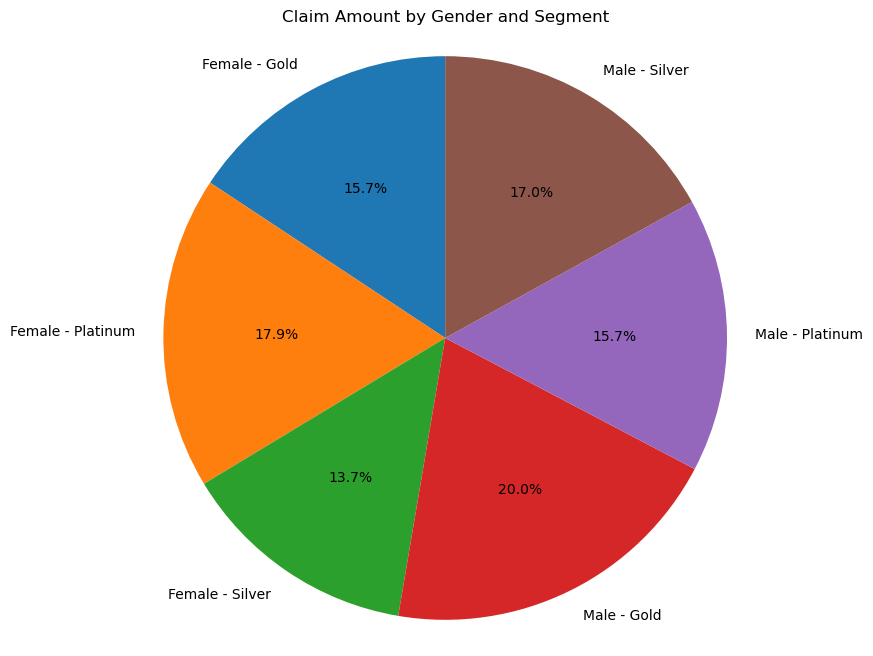

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = pd.merge(claims_data, cust_data[['cust_id', 'gender', 'segment']], 
                       left_on='customer_id', right_on='cust_id', how='inner')

merged_data['claim_amount'] = merged_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

grouped_data = merged_data.groupby(['gender', 'segment'])['claim_amount'].sum().reset_index()

grouped_data['label'] = grouped_data['gender'] + " - " + grouped_data['segment']

plt.figure(figsize=(8, 8))
plt.pie(grouped_data['claim_amount'], labels=grouped_data['label'], autopct='%1.1f%%', startangle=90)
plt.title('Claim Amount by Gender and Segment')
plt.axis('equal')
plt.show()


In [ ]:
12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a 
bar chart.

   gender  claim_amount
0  Female     2977565.0
1    Male     3805699.0


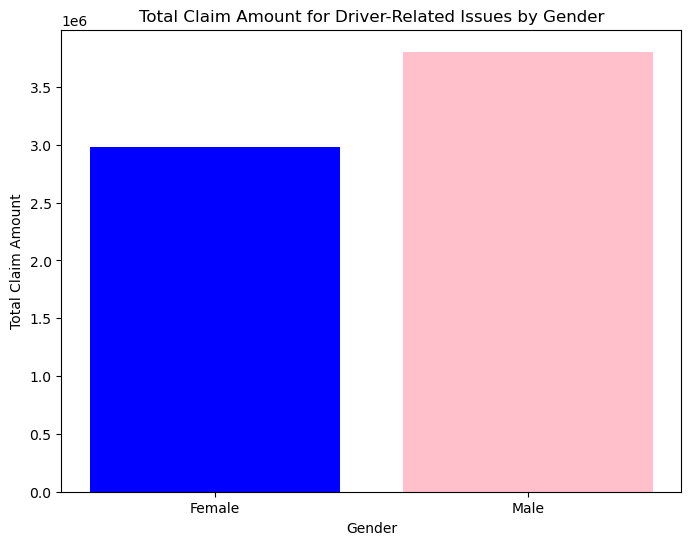

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data['claim_amount'] = claims_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

merged_data = pd.merge(claims_data, cust_data[['cust_id', 'gender']], 
                       left_on='customer_id', right_on='cust_id', how='inner')

driver_claims = merged_data[merged_data['incident_cause'].str.contains('driver', case=False, na=False)]

gender_claims = driver_claims.groupby('gender')['claim_amount'].sum().reset_index()

print(gender_claims)

plt.figure(figsize=(8, 6))
plt.bar(gender_claims['gender'], gender_claims['claim_amount'], color=['blue', 'pink'])
plt.title('Total Claim Amount for Driver-Related Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Claim Amount')
plt.show()


In [ ]:
13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

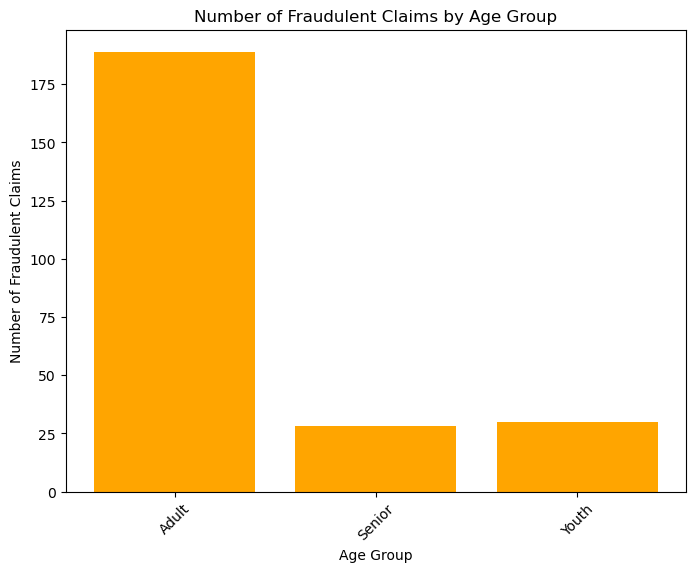

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = pd.merge(claims_data, cust_data[['cust_id', 'gender', 'dateofbirth']], 
                       left_on='customer_id', right_on='cust_id', how='inner')

merged_data['dateofbirth'] = pd.to_datetime(merged_data['dateofbirth'])
merged_data['age'] = (pd.to_datetime('today') - merged_data['dateofbirth']).dt.days // 365

def age_group(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

merged_data['age_group'] = merged_data['age'].apply(age_group)

fraudulent_claims = merged_data[merged_data['fraudulent'] == 'Yes']
age_group_fraud = fraudulent_claims.groupby('age_group').size().reset_index(name='fraudulent_claim_count')

plt.figure(figsize=(8, 6))
plt.bar(age_group_fraud['age_group'], age_group_fraud['fraudulent_claim_count'], color='orange')
plt.title('Number of Fraudulent Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Claims')
plt.xticks(rotation=45)
plt.show()


In [ ]:
14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order.

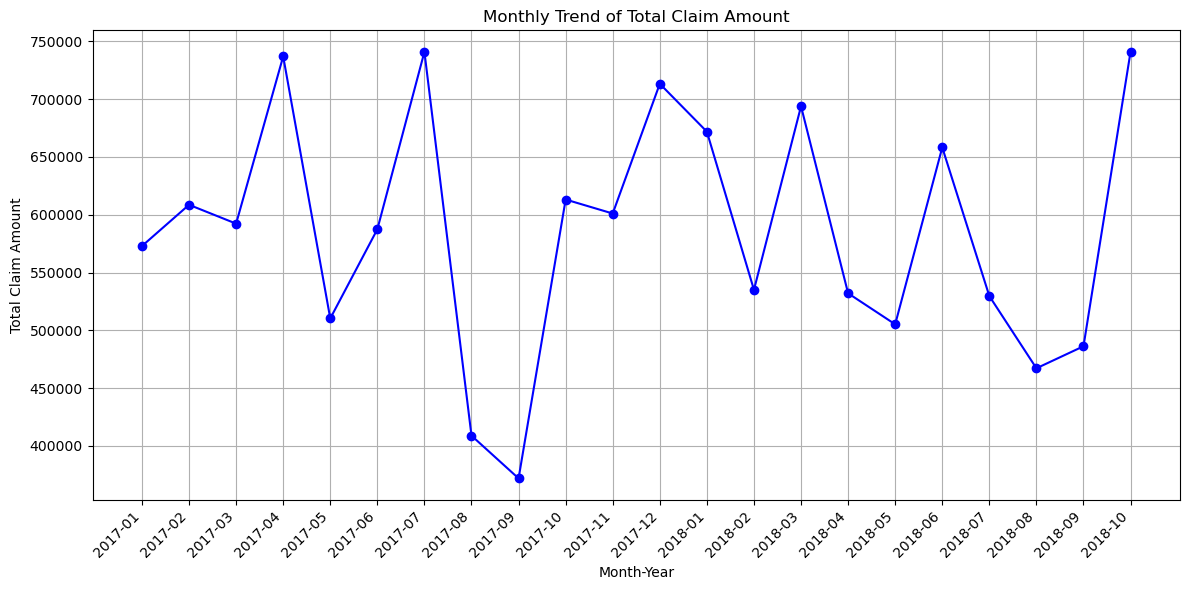

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

claims_data = pd.read_csv('claims_data.csv')

claims_data['claim_amount'] = claims_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True)

claims_data['claim_amount'] = pd.to_numeric(claims_data['claim_amount'], errors='coerce')

claims_data['claim_date'] = pd.to_datetime(claims_data['claim_date'])

claims_data['month_year'] = claims_data['claim_date'].dt.to_period('M')

monthly_claims = claims_data.groupby('month_year')['claim_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_claims['month_year'].astype(str), monthly_claims['claim_amount'], marker='o', color='b')

plt.title('Monthly Trend of Total Claim Amount')
plt.xlabel('Month-Year')
plt.ylabel('Total Claim Amount')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.subplots_adjust(bottom=0.2)

plt.tight_layout()
plt.show()


In [ ]:
15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of 
the statements.

<Figure size 1200x600 with 0 Axes>

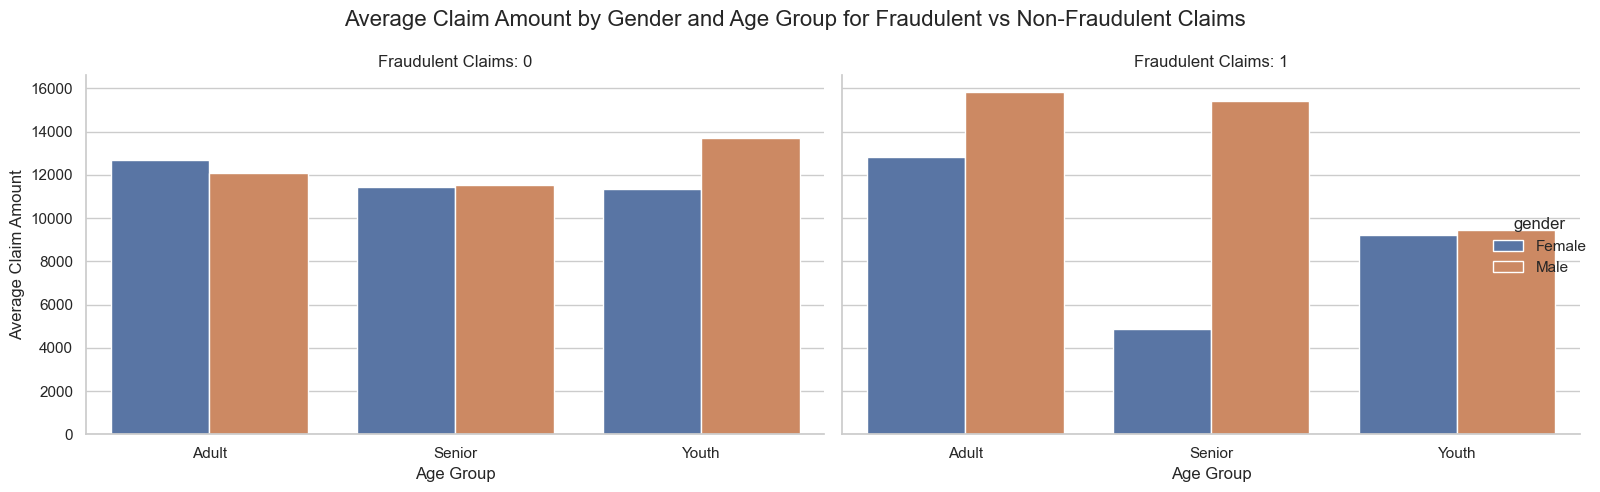

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference in the claim amounts between fraudulent and non-fraudulent claims.


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

claims_data['claim_date'] = pd.to_datetime(claims_data['claim_date'])

claims_data['claim_amount'] = claims_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

claims_data['fraudulent'] = claims_data['fraudulent'].map({'Yes': 1, 'No': 0})

merged_data = pd.merge(claims_data, cust_data, left_on='customer_id', right_on='cust_id', how='inner')

def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

merged_data['age'] = pd.to_datetime('today').year - pd.to_datetime(merged_data['dateofbirth']).dt.year

merged_data['age_group'] = merged_data['age'].apply(categorize_age)

avg_claims = merged_data.groupby(['gender', 'age_group', 'fraudulent'])['claim_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

g = sns.catplot(
    x='age_group', 
    y='claim_amount', 
    hue='gender', 
    col='fraudulent', 
    data=avg_claims, 
    kind='bar', 
    height=5, 
    aspect=1.5
)

g.set_axis_labels('Age Group', 'Average Claim Amount')
g.set_titles('Fraudulent Claims: {col_name}')
g.fig.suptitle('Average Claim Amount by Gender and Age Group for Fraudulent vs Non-Fraudulent Claims', fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.85)

plt.show()

fraudulent_claims = merged_data[merged_data['fraudulent'] == 1]['claim_amount']
non_fraudulent_claims = merged_data[merged_data['fraudulent'] == 0]['claim_amount']

t_stat, p_value = ttest_ind(fraudulent_claims, non_fraudulent_claims, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the claim amounts between fraudulent and non-fraudulent claims.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the claim amounts between fraudulent and non-fraudulent claims.")


In [ ]:
16. Is there any similarity in the amount claimed by males and females?

Missing values in claim_amount: 1085
Unique values in gender column: ['Female' 'Male']


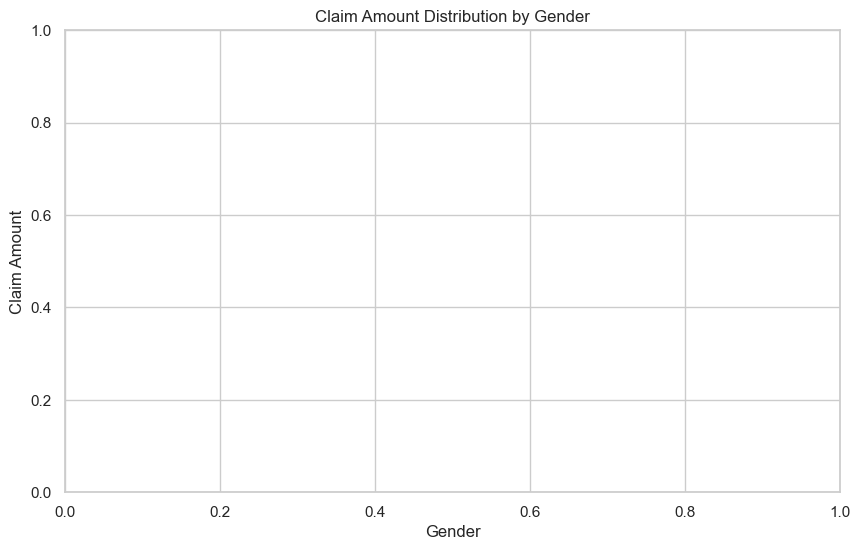

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: No significant difference in claim amounts between males and females.


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = pd.merge(claims_data, cust_data, left_on='customer_id', right_on='cust_id', how='inner')

merged_data['claim_amount'] = pd.to_numeric(merged_data['claim_amount'], errors='coerce')

merged_data['gender'] = merged_data['gender'].str.strip()

print("Missing values in claim_amount:", merged_data['claim_amount'].isna().sum())
print("Unique values in gender column:", merged_data['gender'].unique())

merged_data = merged_data.dropna(subset=['claim_amount', 'gender'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='claim_amount', data=merged_data)
plt.title('Claim Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

male_claims = merged_data[merged_data['gender'] == 'Male']['claim_amount']
female_claims = merged_data[merged_data['gender'] == 'Female']['claim_amount']

t_stat, p_value = ttest_ind(male_claims, female_claims, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in claim amounts between males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference in claim amounts between males and females.")


In [ ]:
17. Is there any relationship between age category and segment?

Index(['Gold', 'Platinum', 'Silver', 'Total'], dtype='object', name='segment')


<Figure size 1000x600 with 0 Axes>

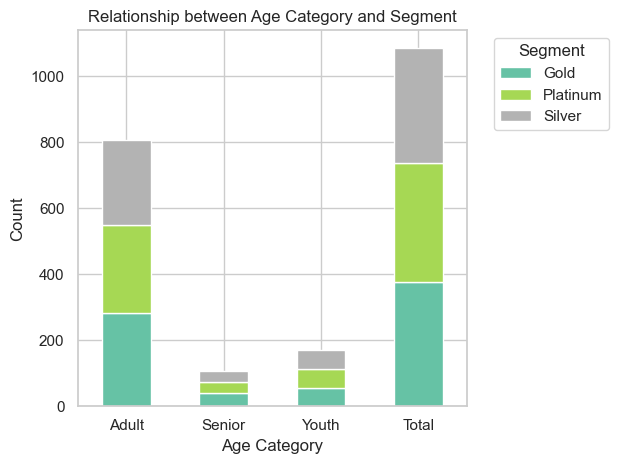

Chi-Square Statistic: 0.8048135600257373
P-Value: 0.9919439814049974
Fail to reject the null hypothesis. There is no significant relationship between age category and segment.


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = pd.merge(claims_data, cust_data, left_on='customer_id', right_on='cust_id', how='inner')

merged_data['dateofbirth'] = pd.to_datetime(merged_data['dateofbirth'], errors='coerce')

current_date = pd.to_datetime('today')
merged_data['age'] = (current_date - merged_data['dateofbirth']).dt.days // 365

def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

merged_data['age_category'] = merged_data['age'].apply(categorize_age)

age_segment_crosstab = pd.crosstab(merged_data['age_category'], merged_data['segment'], margins=True, margins_name="Total")

plt.figure(figsize=(10, 6))

print(age_segment_crosstab.columns)

age_segment_crosstab.drop(columns='Total', inplace=True)

age_segment_crosstab.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Relationship between Age Category and Segment')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

chi2_stat, p_val, dof, expected = chi2_contingency(age_segment_crosstab)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between age category and segment.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age category and segment.")


In [ ]:
18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

Average claim amount for the current year (2025): $nan
Fiscal year 2016-17 average claim amount: $10000
Claim amounts have not risen significantly compared to the fiscal year 2016-17.


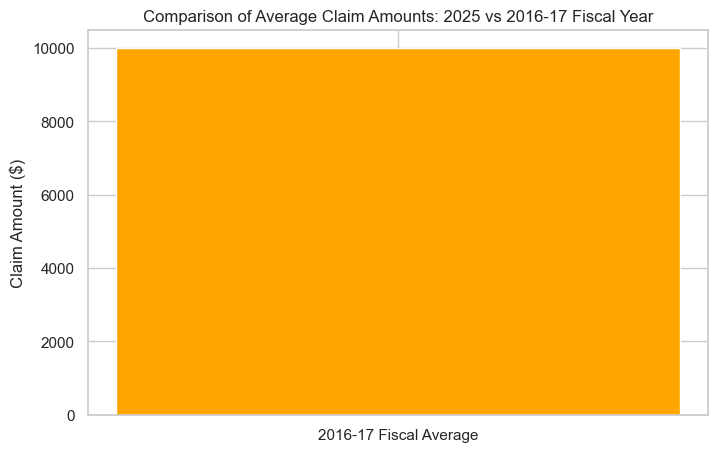

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

claims_data = pd.read_csv('claims_data.csv')

claims_data['claim_date'] = pd.to_datetime(claims_data['claim_date'], errors='coerce')

current_year = pd.to_datetime('today').year
claims_data['year'] = claims_data['claim_date'].dt.year

current_year_claims = claims_data[claims_data['year'] == current_year]

average_claim_current_year = current_year_claims['claim_amount'].dropna().mean()

fiscal_year_2016_17_average = 10000

print(f"Average claim amount for the current year ({current_year}): ${average_claim_current_year:.2f}")
print(f"Fiscal year 2016-17 average claim amount: ${fiscal_year_2016_17_average}")

if average_claim_current_year > fiscal_year_2016_17_average:
    print("There is a significant rise in claim amounts compared to the fiscal year 2016-17.")
else:
    print("Claim amounts have not risen significantly compared to the fiscal year 2016-17.")

labels = ['Current Year Average', '2016-17 Fiscal Average']
values = [average_claim_current_year, fiscal_year_2016_17_average]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title(f"Comparison of Average Claim Amounts: {current_year} vs 2016-17 Fiscal Year")
plt.ylabel("Claim Amount ($)")
plt.show()


In [ ]:
19. Is there any difference between age groups and insurance claims?

Claims Data Head:
   claim_id  customer_id      incident_cause  claim_date claim_area  \
0  54004764     21868593        Driver error  2017-11-27       Auto   
1  33985796     75740424               Crime  2018-10-03       Home   
2  53522022     30308357  Other driver error  2018-02-02       Auto   
3  13015401     47830476      Natural causes  2018-06-17       Auto   
4  22890252     19269962               Crime  2018-01-13       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  
0            No  Material only        $2980                  1.0         No  
1       Unknown  Material only        $2980                  3.0         No  
2            No  Material only      $3369.5                  1.0        Yes  
3            No  Material only        $1680                  1.0         No  
4            No  Material only        $2680                  1.0         No  
Customer Data Head:
    cust_id  gender dateofbirth state       contact   segment
0  21

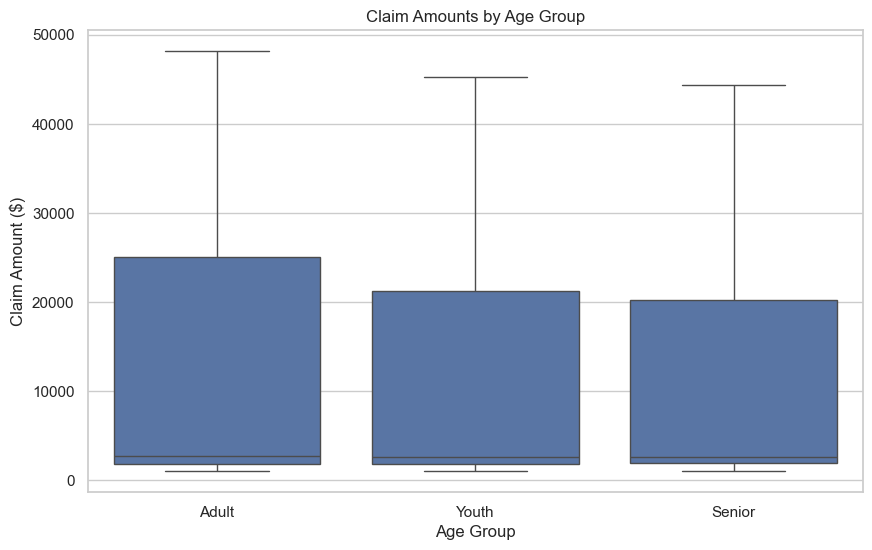

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

print("Claims Data Head:")
print(claims_data.head())
print("Customer Data Head:")
print(cust_data.head())

cust_data['dateofbirth'] = pd.to_datetime(cust_data['dateofbirth'])

current_year = datetime.now().year
cust_data['age'] = current_year - cust_data['dateofbirth'].dt.year

def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age <= 30:
        return 'Youth'
    elif 30 < age <= 60:
        return 'Adult'
    else:
        return 'Senior'

cust_data['age_group'] = cust_data['age'].apply(categorize_age)

print(f"Missing customer_id in claims_data: {claims_data['customer_id'].isnull().sum()}")
print(f"Missing claim_amount in claims_data: {claims_data['claim_amount'].isnull().sum()}")
print(f"Missing cust_id in cust_data: {cust_data['cust_id'].isnull().sum()}")
print(f"Missing age_group in cust_data: {cust_data['age_group'].isnull().sum()}")

claims_data['claim_amount'] = claims_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True)
claims_data['claim_amount'] = pd.to_numeric(claims_data['claim_amount'], errors='coerce')

claims_data = claims_data.merge(cust_data[['cust_id', 'age_group']], left_on='customer_id', right_on='cust_id', how='inner')

claims_data = claims_data.dropna(subset=['claim_amount'])

print("Merged Claims Data Head:")
print(claims_data.head())

age_group_distribution = claims_data[['age_group', 'claim_amount']].groupby('age_group').count()
print("Age Group Distribution with Claims:")
print(age_group_distribution)

empty_groups = age_group_distribution[age_group_distribution['claim_amount'] == 0]
if len(empty_groups) > 0:
    print(f"These age groups have no claim data: {empty_groups.index.tolist()}")
else:
    print("All age groups have claim data.")

age_groups = claims_data['age_group'].unique()
claims_by_age_group = [claims_data[claims_data['age_group'] == group]['claim_amount'] for group in age_groups]

if len(claims_by_age_group) > 1:
    anova_result = stats.f_oneway(*claims_by_age_group)
    print(f'ANOVA Test Result: p-value = {anova_result.pvalue}')
    if anova_result.pvalue < 0.05:
        print("There is a significant difference between age groups and insurance claims.")
    else:
        print("There is no significant difference between age groups and insurance claims.")
else:
    print("Insufficient data for ANOVA test (less than two groups with claims).")

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='claim_amount', data=claims_data)
plt.title('Claim Amounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount ($)')
plt.show()


In [ ]:
20. Is there any relationship between total number of policy claims and the claimed amount?

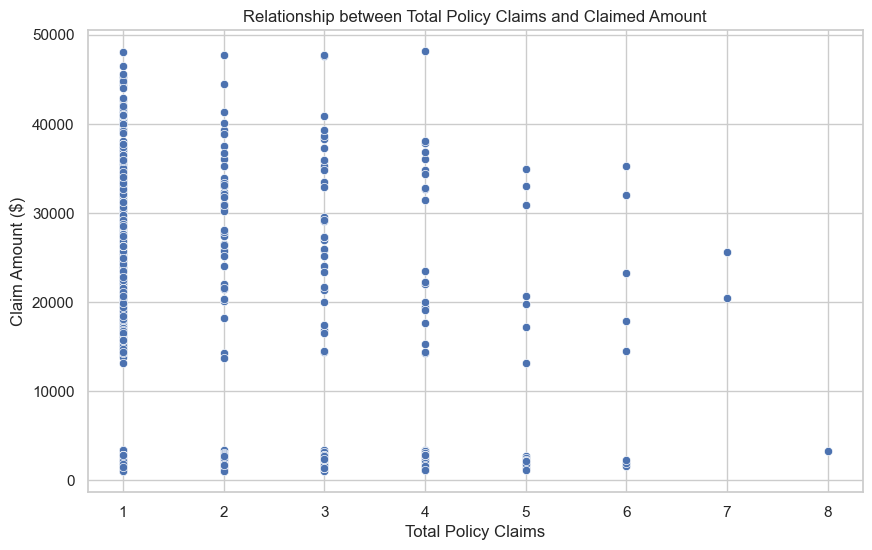

Pearson correlation coefficient: -0.01808658678959941
There is little to no correlation between the total number of policy claims and the claimed amount.


In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

claims_data = pd.read_csv('claims_data.csv')
cust_data = pd.read_csv('cust_data.csv')

merged_data = claims_data.merge(cust_data[['cust_id', 'gender', 'segment']], left_on='customer_id', right_on='cust_id')

merged_data['claim_amount'] = merged_data['claim_amount'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_policy_claims', y='claim_amount', data=merged_data)
plt.title('Relationship between Total Policy Claims and Claimed Amount')
plt.xlabel('Total Policy Claims')
plt.ylabel('Claim Amount ($)')
plt.show()

correlation = merged_data[['total_policy_claims', 'claim_amount']].corr().iloc[0, 1]
print(f"Pearson correlation coefficient: {correlation}")

if correlation > 0.7:
    print("There is a strong positive correlation between the total number of policy claims and the claimed amount.")
elif correlation > 0.3:
    print("There is a moderate positive correlation between the total number of policy claims and the claimed amount.")
else:
    print("There is little to no correlation between the total number of policy claims and the claimed amount.")
